In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import joblib
import json
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn import over_sampling, under_sampling
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score, precision_recall_fscore_support, precision_recall_curve
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold
from skopt import BayesSearchCV
from skopt.space import Integer, Real
from feature_engine.selection import SmartCorrelatedSelection

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Challenge Activities (Questions 5 to 12)

In [56]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df = pd.read_csv("../data/air_system_previous_years.csv")

## Exploratory Data Analysis

### Question 5

What types of analyzes would you like to perform on the customer database?

- Since de columns of the databases are encoded, we can't do much Exploratory Data Analysys to achieve more interpretation on what the values distribution of each columns represent, because there are to much columns to analyse manually (171 columns) and the grafical distributions related to the target variable wouldn't be worth, since we don't know. If the features weren't encoded, we could get more out of a graphical analysis, like doing scatterplots (two numerical variables), boxplots (one categorical varibale and other numerical) and so on...

In [57]:
df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,0,37250,1432864,3664156,1007684,25896,0,2551696,0,0,0,0,0,4933296,3655166,1766008,1132040,0,0,0,0,1012,268,0,0,0,0,0,469014,4239660,703300,755876,0,5374,2108,4114,12348,615248,5526276,2378,4,0,0,2328746,1022304,415432,287230,310246,681504,1118814,3574,0,0,6700214,0,10,108,50,2551696,97518,947550,799478,330760,353400,299160,305200,283680,na,na,na,178540,76698.08,6700214,6700214,6599892,43566,68656,54064,638360,6167850,1209600,246244,2,96,0,5245752,0,916567.68,6,1924,0,0,0,118196,1309472,3247182,1381362,98822,11208,1608,220,240,6700214,na,10476,1226,267998,521832,428776,4015854,895240,26330,118,0,532,734,4122704,51288,0,532572,0,18,5330690,4732,1126,0,0,0,0,0,0,0,0,62282,85908,32790,0,0,202710,37928,14745580,1876644,0,0,0,0,2801180,2445.8,2712,965866,1706908,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,0,18254,653294,1720800,516724,31642,0,1393352,0,68,0,0,0,2560898,2127150,1084598,338544,0,0,0,0,0,0,0,0,0,0,0,71510,772720,1996924,99560,0,7336,7808,13776,13086,1010074,1873902,14726,6,0,0,1378576,447166,199512,154298,137280,138668,165908,229652,87082,4708,3646660,86,454,364,350,1393352,49028,688314,392208,341420,359780,366560,na,na,na,na,na,6700,33057.51,3646660,3646660,3582034,17733.0,260120,115626,6900,2942850,1209600,0,na,na,na,2291079.36,0,643536.96,0,0,0,0,38,98644,1179502,1286736,336388,36294,5192,56,na,0,3646660,na,6160,796,164860,350066,272956,1837600,301242,9148,22,0,na,na,na,na,na,na,na,na,na,3312,522,0,0,0,0,0,0,0,0,33736,36946,5936,0,0,103330,16254,4510080,868538,0,0,0,0,3477820,2211.76,2334,664504,824154,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,0,1648,370592,1883374,292936,12016,0,1234132,0,0,0,0,0,2371990,2173634,300796,153698,0,0,0,0,358,110,0,0,0,0,0,0,870456,239798,1450312,0,1620,1156,1228,34250,1811606,710672,34,0,0,0,790690,672026,332340,254892,189596,135758,103552,81666,46,0,2673338,128,202,576,4,1234132,28804,160176,139730,137160,130640,na,na,na,na,na,na,28000,41040.08,2673338,2673338,2678534,15439.0,7466,22436,248240,2560566,1209600,63328,0,124,0,2322692.16,0,236099.52,0,0,0,0,0,33276,1215280,1102798,196502,10260,2422,28,0,6,2673338,na,3584,500,56362,149726,100326,1744838,488302,16682,246,0,230,292,2180528,29188,22,20346,0,0,2341048,1494,152,0,0,0,0,0,0,0,0,13876,38182,8138,0,0,65772,10534,300240,48028,0,0,0,0,1040120,1018.64,1020,262032,453378,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,318,2212,3232,1872,0,0,0,2668,0,0,0,642,3894,10184,7554,10764,1014,0,0,0,0,60,6,0,0,0,0,0,0,0,2038,5596,0,64,6,6,914,76,2478,2398,1692,0,0,6176,340,304,102,74,406,216,16,0,0,21614,2,12,0,0,2668,184,7632,3090,na,na,na,na,na,na,na,na,10580,12.69,21614,21614,21772,32,50,1994,21400,7710,120960

In [58]:
df.tail()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
59995,neg,153002,na,664,186,0,0,0,0,0,2564,59100,1603216,6015982,1968266,164972,12560,4880368,0,280,0,1224,2114,8913782,7998174,1929126,776370,2,0,0,0,3328,1080,0,0,0,0,0,45114,2533260,2542338,4705948,0,7620,3470,4506,7466,60160,9737500,5938,0,0,0,3245782,2124728,917904,744468,580332,446850,496786,1264596,5214,0,10845228,1304,1206,1606,14,4880368,129760,1244058,678792,263320,221620,221100,245580,152420,212500,151980,199220,247880,153001.45,10845228,10845228,10850870,71618,64462,108200,1153820,9826660,1209600,243498,0,84,0,8289544.32,0,1529548.8,102,2360,0,860,16808,404890,3156012,5101686,1080888,56042,9214,260,224,574,10845228,na,12450,1270,138036,1107360,425276,5875496,2230222,36428,122,0,344,742,1760956,23486,0,146,0,0,1872932,4936,1600,0,0,0,0,0,0,0,0,62846,137050,27546,0,0,265640,54496,470800,293652,0,0,0,0,80125300,2912.04,2858,1608808,1479066,998500,566884,1290398,1218244,1019768,717762,898642,28588,0,0
59996,neg,2286,na,2130706538,224,0,0,0,0,0,0,104,99186,36564,128,0,0,56982,0,0,0,0,0,123604,108768,24020,11622,0,0,0,0,192,56,0,0,0,0,0,4610,99120,11292,20960,0,1238,28,28,34,276,134204,174,0,0,0,44228,60952,17376,8610,2990,1048,592,186,0,0,147638,2,14,716,0,56982,1900,14404,9572,na,na,na,na,na,na,na,na,23720,2285.92,147638,147638,150094,525.0,294,14558,147260,135982,1209600,3126,2,4,0,123344.64,0,11387.52,0,28,0,0,0,61572,63554,10126,602,128,0,0,0,6,147638,na,1340,32,3606,9664,2112,40190,75776,3066,196,0,330,214,123730,66850,0,18,0,10,124152,114,56,0,0,0,0,0,0,0,0,1066,808,600,0,0,2450,510,823720,82346,16440,20,0,0,1285980,80.4,82,13934,15024,10578,6760,21126,68424,136,0,0,0,0,0
59997,neg,112,0,2130706432,18,0,0,0,0,0,0,28,11592,11538,0,0,0,8784,0,0,0,0,0,29698,23762,13970,874,0,0,0,0,36,20,0,0,0,0,0,0,0,704,22454,0,782,524,916,3940,924,13632,2440,0,0,0,18542,2236,856,490,162,424,234,158,20,36,43738,6,10,2,0,8784,480,7640,6224,na,na,na,na,na,na,na,na,13440,112.49,43738,43738,44562,83.0,0,4138,42880,23310,1209600,630,2,0,0,7518.72,4221.12,10493.76,22,96,0,0,0,3956,14690,4040,464,8,0,0,0,68,43738,0,1034,24,72,518,5348,14382,1772,8,0,0,38,36,8864,2482,0,184,0,0,8864,148,74,0,7042,0,0,0,0,0,0,622,0,0,4544,2398,162,58,7920,784,9112,0,0,0,0,2.76,134,15876,2740,792,386,452,144,146,2622,0,0,0,0
59998,neg,80292,na,2130706432,494,0,0,0,0,0,0,330,202498,3251010,2061456,360436,59754,2634394,0,0,0,0,0,4543410,3227856,1615634,1214970,0,0,57300,0,2124,1090,0,0,0,0,0,119742,4445146,1370596,0,0,5518,4092,4534,10448,940376,4970242,274,0,0,0,2154166,1022460,385878,287818,239818,265302,552874,1027168,0,0,6159728,64,78,424,70,2634394,105862,580084,1032454,302700,332300,308960,282140,362360,na,na,na,18940,80292.76,6159728,6159728,6092764,50665.0,102012,3012,103140,5935484,1209600,240008,2,122,0,4776505.92,106006.08,1048805.76,0,1254,0,0,0,11460,760936,3250610,1761252,1335

In [59]:
df.shape

(60000, 171)

In [60]:
## Replacing 'na' strings with a real NaN

for i in df.columns:
    df[i] = df[i].replace('na', np.nan)

In [61]:
## Unique values of dataset features

unique_values = []

for col in df.columns:
    valores_unicos = len(df[col].astype(str).value_counts())
    unique_values.append(valores_unicos)

unique_values.sort()
print(unique_values)

[2, 2, 3, 22, 29, 30, 48, 50, 54, 57, 69, 73, 75, 135, 147, 155, 160, 182, 222, 257, 264, 334, 337, 403, 419, 448, 467, 526, 618, 647, 749, 774, 895, 920, 973, 987, 1033, 1056, 1099, 1272, 1314, 1531, 1768, 1861, 1887, 1894, 2062, 2124, 2216, 2316, 2423, 2618, 2808, 3056, 3344, 3512, 3520, 3566, 3807, 3861, 3877, 3919, 3931, 4056, 4277, 4969, 5356, 5420, 5619, 5839, 6312, 6564, 6683, 6798, 7097, 7379, 7618, 7880, 8111, 9018, 9038, 9065, 9185, 9298, 9725, 10118, 10583, 10728, 11569, 11817, 11970, 12307, 12835, 12918, 14736, 14790, 15911, 16548, 17301, 18933, 19697, 20515, 21099, 21531, 21997, 22076, 22095, 22628, 23072, 24214, 25167, 25237, 25241, 26313, 27832, 28278, 28319, 28496, 29282, 29594, 30140, 30171, 30470, 30674, 31142, 31712, 31796, 32126, 32427, 32915, 32929, 33178, 34078, 34111, 34489, 34559, 34629, 34922, 35189, 35194, 35959, 36289, 37823, 38246, 38360, 38555, 38652, 40165, 40616, 40798, 40917, 41816, 42087, 42099, 42559, 43569, 43572, 43860, 44602, 44673, 44841, 45044, 45

In [62]:
## Assuming that features with fewer than 10 distinct values are categorical

categorical_columns = []

for i in df.columns:
    if len(df[i].unique()) < 10:
        categorical_columns.append(i)
        print(f"Categorical feature {i}")

Categorical feature class
Categorical feature cd_000
Categorical feature ch_000


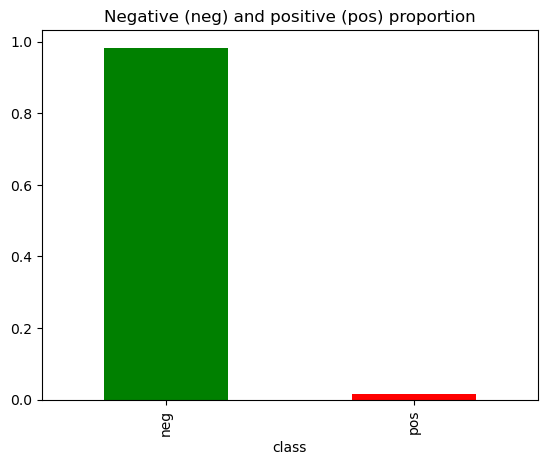

In [63]:
_ = df["class"].value_counts(normalize=True).plot(kind="bar", title="Negative (neg) and positive (pos) proportion", color=["green","red"])

Unbalanced target variable

In [64]:
df["class"].value_counts(normalize=True) # Percentage of each class

class
neg    0.983333
pos    0.016667
Name: proportion, dtype: float64

In [65]:
df["class"].value_counts() # Absolute values

class
neg    59000
pos     1000
Name: count, dtype: int64

In [66]:
df["cd_000"].value_counts()

cd_000
1209600    59324
Name: count, dtype: int64

Possibly categorical variable with only one class. Can be excluded

In [68]:
## Removing columns with more than 10% null values
# Removing variable "cd_000"

missing_proportion = df.isnull().mean().sort_values()
cols_to_drop_ = missing_proportion[missing_proportion > 0.10]
cols_to_drop_['cd_000'] = 0
cols_to_drop = cols_to_drop_.index
df = df.drop(columns=cols_to_drop)
df.shape

(60000, 142)

In [69]:
## Labelling the rest of the variables as numeric

numerical_cols = [col for col in df.columns if col not in categorical_columns]

In [70]:
## Transforming numeric variables to float
# Categorical variables are already in the expected type

for var in numerical_cols:
    df[var] = df[var].astype(float)

In [71]:
df.describe()

,aa_000,ac_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,ce_000,ci_000,cj_000,ck_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,cp_000,cq_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,6.000000e+04,5.666500e+04,57500.000000,57500.000000,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.935500e+04,5.937100e+04,5.937100e+04,5.560000e+04,5.935800e+04,5.937100e+04,5.935800e+04,5.941100e+04,5.935800e+04,5.941100e+04,57277.000000,5.937100e+04,5.937100e+04,5.937100e+04,57500.000000,57499.000000,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,59329.000000,5.931200e+04,5.931200e+04,5.931200e+04,5.931200e+04,5.931200e+04,5.931200e+04,5.931200e+04,5.931200e+04,5.931200e+04,5.931200e+04,5.935500e+04,57275.000000,57273.000000,57497.000000,57500.000000,5.935800e+04,5.935800e+04,5.941100e+04,5.941100e+04,5.927400e+04,5.983300e+04,5.930900e+04,5.930900e+04,5.674300e+04,5.952700e+04,5.727700e+04,55644.000000,5.927400e+04,5.674500e+04,5.749800e+04,5.966200e+04,5.966200e+04,5.966200e+04,5.931300e+04,5.931300e+04,5.931300e+04,5.931300e+04,5.931300e+04,5.931300e+04,5.931300e+04,5.931300e+04,5.931300e+04,5.931300e+04,57276.000000,5.930900e+04,59331.000000,59331.000000,5.933100e+04,5.933100e+04,5.933100e+04,5.933100e+04,5.933100e+04,5.933100e+04,5.933100e+04,5.933100e+04,57497.000000,57276.000000,5.599200e+04,5.599200e+04,5.599200e+04,5.599400e+04,55993.000000,5.599300e+04,5.599200e+04,5.599100e+04,5.930900e+04,5.727600e+04,57274.000000,5.727400e+04,5.727400e+04,5.727300e+04,57273.000000,5.727400e+04,5.727400e+04,5.727700e+04,5.727600e+04,57277.000000,57277.000000,5.599300e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,57276.000000,57277.000000
mean,5.933650e+04,3.560143e+08,6.819130,11.006817,2.216364e+02,9.757223e+02,8.606015e+03,8.859128e+04,4.370966e+05,1.108374e+06,1.657818e+06,4.993098e+05,3.556989e+04,5.114753e+03,1.809931e+06,9.016965e+03,1.143675e+03,9.794900e+02,5.913048e+04,9.328133e+04,3.461037e+06,3.002440e+06,1.004160e+06,4.424045e+05,0.496918,1.267365e+02,5.072046e+03,2.305804e+02,1117.825913,374.327380,1.221165e+04,1.019012e+04,1.097500e+04,7.225784e+03,1.056600e+04,1.119791e+05,1.078551e+06,1.546032e+06,1.051123e+06,1.162622e+03,7.849608e+03,4.420992e+03,8.066082e+03,8.724082e+04,1.476897e+06,2.135584e+06,1.018943e+05,1.737782e+04,6.617861e+02,42.073455,1.399652e+06,8.941175e+05,4.130969e+05,2.740070e+05,2.048756e+05,1.889412e+05,2.106288e+05,1.857874e+05,3.588284e+04,3.576672e+04,4.526177e+06,569.526565,921.775461,1372.646086,74.878261,1.809431e+06,5.794308e+04,4.922076e+05,5.100892e+05,8.036055e+04,5.941650e+04,4.515325e+06,4.515325e+06,4.112218e+06,2.202893e+04,1.019608e+05,39168.817123,4.056381e+05,3.803444e+06,6.434356e+04,3.481204e+06,1.028419e+05,7.143427e+05,2.336674e+03,2.195149e+04,1.610509e+05,5.314780e+05,1.282835e+06,1.341059e+06,4.105641e+05,6.442513e+04,1.922679e+04

## Model Training and Validation

### Question 6, 7, 8 and 9

6. What techniques would you use to reduce the dimensionality of the problem?

    - Reducing the dimensionality of a dataset with more than 140 features can significantly enhance the performance of a machine learning model. By removing noise and redundant features, the model becomes less complex and more generalizable, so it helps to avoid overfitting.
    
    - Principal Component Analysis (PCA): A linear dimensionality reduction technique that transforms the data into a new coordinate system where the greatest variances lie on the first coordinates (principal components), the second greatest variance on the second coordinate, and so on. It projects the data onto a lower-dimensional space by maximizing the variance of the projected data. The principal components are orthogonal to each other, which can help in dealing with multicollinearity. By ignoring components with low variance, which often represent noise, PCA can lead to more robust models.
    
    - Linear Discriminant Analysis (LDA): LDA is a supervised dimensionality reduction technique that seeks to find the linear combination of features that best separates two or more classes. It projects the data in such a way that the separability among the classes is maximized.
    
    - Quadratic Discriminant Analysis (QDA): QDA is a classification technique that assumes each class has its own covariance matrix, unlike LDA which assumes a shared covariance matrix among classes. QDA requires more parameters to estimate (separate covariance matrices for each class), which can lead to overfitting if the dataset is small
    
    To solve this specific problem, it was chose the PCA algorithm, since it's a simple, fast and efective technique to reduce de complexity of the data to avoid overfitting.

7. What techniques would you use to select variables for your predictive model?

    - Feature selection helps in reducing overfitting, since eliminating irrelevant or redundant features, the model becomes less complex and generalizes better. In addiction, with fewer features, the model can be trained faster and make predictions more efficiently (good to put the model in to production).
      
    -  SmartCorrelatedFeatures Selection: Involves selecting features based on their correlation with the target variable and among themselves. Highly correlated features (with each other) are considered redundant, and only one from each correlated group is selected. By removing highly correlated features, it helps in reducing redundancy and thus simplifies the model. Since it reduces multicollinearity, it can lead to a more stable and interpretable model.
  
    -  Recursive Feature Elimination (RFE): Is a recursive process that involves fitting a model and removing the least important feature(s) based on model coefficients or feature importance. This process is repeated until the desired number of features is reached. It may be inefficient in terms of performance.
  
    -  VarianceThreshold: This technique removes features with low variance, assuming that features with low variance do not carry much information. Low-variance features often contribute little to the predictive power and may add noise to the model.
  
    -  SelectKBest: Selects the top K features based on univariate statistical tests such as ANOVA, chi-square, or mutual information. Uses various statistical tests to score and rank features and allows selection of a predefined number of top features.
  
    SmartCorrelatedFeatures Selection and VarianceThreshold was chose beacuse RFE would be to inefficient in terms of performance in our database and SelectKBest doesn't account for interactions between features or redundancy among them, since it evaluates each feature individually based on its relationship with the target variable.

In [76]:
X = df.drop(columns="class", axis=1) # Independent variables
y = df["class"] # Dependent variable

In [73]:
def label_transform(y):
    return y.replace({'neg': 0, 'pos': 1})

In [74]:
y_trans = label_transform(y)

In [75]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), numerical_cols),
    ]
)

8. What predictive models would you use or test for this problem? Please indicate at least 3.

    - Gradient Boosting: builds an ensemble of trees sequentially, where each tree corrects the errors of the previous ones. It's powerful for capturing complex patterns in the data. This algorithm has a high performance.
      
    - Logistic Regression: is a linear model used for binary classification tasks. It predicts the probability of a binary outcome. Serves as a good baseline for binary classification problems.
  
    - Support Vector Machines (SVM): finds a hyperplane that best separates the data into classes. It can handle linear and non-linear classification through kernel tricks. It's suitable for datasets with many features.
  
    - Naive Bayes: is a probabilistic classifier based on Bayes' theorem, assuming independence between features.
  
    - Random Forest: is an ensemble method that builds multiple decision trees and merges them to improve accuracy and control overfitting.
  
    - AdaBoost: combines weak classifiers in a sequential manner, where each subsequent classifier focuses on the errors made by the previous ones.
  
    - XGBoost: is an optimized implementation of gradient boosting with additional regularization to prevent overfitting. Performs well on large datasets and is known for its speed and efficiency.
  
    - LightGBM: is a gradient boosting framework that uses tree-based learning algorithms and is designed for efficiency and speed.
  
    - CatBoost: is a gradient boosting algorithm that handles categorical features natively and reduces overfitting.

In [78]:
# Testing various models to choose the one with the best recall

models = {
    'Gradient Boosting': GradientBoostingClassifier(random_state=321),
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(probability=True, random_state=321),
    'Naive Bayes': GaussianNB(),
    'Random Forest': RandomForestClassifier(random_state=321),
    'AdaBoost': AdaBoostClassifier(random_state=321),
    'XGBoost': XGBClassifier(random_state=321),
    'LightGBM': LGBMClassifier(random_state=321),
    'CatBoost': CatBoostClassifier(random_state=321, verbose=0)
}

In [79]:
def run_models_pipeline(preprocessor, bal, scaler, threshold, sel_algorithm, dim_reduc, model, X, y):
    pipeline = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('balancer', bal),
        ('scaler', scaler),
        ('threshold', threshold),
        ('feature_selection', sel_algorithm),
        ('dim_reduction_algorithm', dim_reduc),
        ('classifier', model)
    ])

    cross_validation = KFold(n_splits=5, shuffle=True, random_state=123)
    scores = cross_val_score(pipeline, X, y, cv=cross_validation, scoring='recall')

    return [scores.mean(), pipeline]

Note: The "ImbPipeline" is a specific pipeline from imbalanced-learn package that can handle with over-sampling techiques like SMOTE. This pipeline only allows the training dataset to go through the over-sampling technique labelled as 'balancer', so the test dataset will not go through this step.

In [80]:
# Compares recall using cross-validation for some classification models

all_scores = {}

for name, model in models.items():
    score_and_pipeline = run_models_pipeline(preprocessor, over_sampling.SMOTE(random_state=42),
                               StandardScaler(with_mean=False), VarianceThreshold(0.01),
                               SmartCorrelatedSelection(threshold=0.8, selection_method='variance'),
                               PCA(n_components=14), model, X, y_trans)

    all_scores[name] = score_and_pipeline
    print(f"{name} Mean Recall: {score_and_pipeline[0]}")

Gradient Boosting Mean Recall: 0.939047351710603
Logistic Regression Mean Recall: 0.897023752979335
SVM Mean Recall: 0.9052199893028374
Naive Bayes Mean Recall: 0.751881116320479
Random Forest Mean Recall: 0.8682586760198066
AdaBoost Mean Recall: 0.925214460042216
XGBoost Mean Recall: 0.8473053286829053
[LightGBM] [Info] Number of positive: 47197, number of negative: 47197
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002393 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3570
[LightGBM] [Info] Number of data points in the train set: 94394, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 47202, number of negative: 47202
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001883 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total

9. How would you rate which of the trained models is the best?
    
    - All those models mentioned in the question 8 were tested above. Their performance were evaluated by getting the mean of the recalls calculated between the 5 cross-validation sets of which model. The model was chosen based on the best average recall.

In [81]:
best_score = max(list(all_scores.items()), key=lambda x: x[1])
best_model = best_score[0]
print(f"Best Model:", best_model)

Best Model: Gradient Boosting


In [82]:
pipe = best_score[1][1]
pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  SimpleImputer(strategy='median'),
                                                  ['aa_000', 'ac_000', 'ae_000',
                                                   'af_000', 'ag_000', 'ag_001',
                                                   'ag_002', 'ag_003', 'ag_004',
                                                   'ag_005', 'ag_006', 'ag_007',
                                                   'ag_008', 'ag_009', 'ah_000',
                                                   'ai_000', 'aj_000', 'ak_000',
                                                   'al_000', 'am_0', 'an_000',
                                                   'ao_000', 'ap_000', 'aq_000',
                                                   'ar_000', 'as_000', 'at_000',
                                                   'au_000', 'av_000', 'ax_000', ...])])),
                ('balancer', SMOTE(random_state=42)),
                ('scaler', StandardScaler(with_mean=False)),
                ('threshold', VarianceThreshold(threshold=0.01)),
                ('feature_selection',
                 SmartCorrelatedSelection(selection_method='variance')),
                ('dim_reduction_algorithm', PCA(n_components=14)),
                ('classifier', GradientBoostingClassifier(random_state=321))])

### Questions 10 and 12

First it will be answered the question 12, then the question 10.

12. What techniques would you use to perform the hyperparameter optimization of the chosen model?

    - GridSearchCV: Exhaustively searches over a specified parameter grid and can be computationally expensive and time-consuming, especially with a large number of hyperparameters and parameter values, but is simple to understand.

    - RandomSearchCV: Randomly samples hyperparameters from a specified distribution and its faster than GridSearchCV as it doesn’t explore all possible combinations. Often finds good solutions with fewer iterations, but still may miss the optimal hyperparameters, especially in high-dimensional spaces.
   
    - BayesSearchCV: Uses Bayesian Optimization to iteratively search for the best hyperparameters. It builds a probabilistic model of the objective function and uses it to select the most promising hyperparameters to evaluate next. More efficient than GridSearchCV and RandomSearchCV, as it focuses on promising regions of the hyperparameter space.
   
It was chose the BayesSearchCV, because he can use past evaluation results to inform future hyperparameter selections, in other words, BayesSearchCV is an smart searcher. It can handle the complexity of optimizing multiple components, including the model itself and preprocessing steps like feature selection and dimensionality reduction, as shown below:

In [83]:
param_space = {
    'classifier__n_estimators': (50, 300),
    'classifier__max_depth': (3, 10),
    'classifier__min_samples_split': (2, 10),
    'classifier__min_samples_leaf': (1, 5),
    'classifier__subsample': (0.5, 1.0),
    'classifier__max_features': (1, 10),
    'threshold__threshold': (0.0, 0.3),
    'feature_selection__threshold': (0.6, 0.9),
    'dim_reduction_algorithm__n_components': (7, 46)
}

cross_validation = KFold(n_splits=5, shuffle=True, random_state=123)

bayes_search = BayesSearchCV(
    estimator=pipe,
    search_spaces=param_space,
    n_iter=96,
    cv=cross_validation,
    scoring='recall',
    n_jobs=-1,
    random_state=123
)

bayes_search.fit(X, y_trans)

print(f"Best hyperparameters: {bayes_search.best_params_}")
print("Best recall score:", bayes_search.best_score_)

Best hyperparameters: OrderedDict([('classifier__max_depth', 3), ('classifier__max_features', 2), ('classifier__min_samples_leaf', 5), ('classifier__min_samples_split', 2), ('classifier__n_estimators', 50), ('classifier__subsample', 1.0), ('dim_reduction_algorithm__n_components', 39), ('feature_selection__threshold', 0.8011859032983073), ('threshold__threshold', 0.0)])
Best recall score: 0.9530595804263227


10. How would you explain the result of your model? Is it possible to know which variables are most important?

    - Since the variables are encoded and it was used PCA to reduce dimensionality, its dificult to know which variables are most important ones. But the model can return us the 39 components of PCA ordered by importance:

In [108]:
## Feature Importance of the best model (39 features in total because of dimension reduction)

best_pipeline = bayes_search.best_estimator_
best_classifier = best_pipeline.named_steps['classifier']
feature_importances = pd.Series(best_classifier.feature_importances_)
feature_importances.sort_values(ascending=False)

0     0.260719
20    0.071685
5     0.057785
21    0.052788
35    0.052190
36    0.046285
1     0.045575
4     0.039978
38    0.038244
19    0.035912
17    0.033637
27    0.032108
37    0.031499
2     0.028679
12    0.023888
3     0.022241
29    0.021233
14    0.020142
6     0.019939
18    0.011358
24    0.011184
15    0.011164
10    0.004402
13    0.004227
25    0.004194
16    0.003526
8     0.002940
30    0.002298
22    0.001761
33    0.001623
23    0.001321
31    0.001296
32    0.001053
26    0.000973
9     0.000941
28    0.000916
7     0.000220
34    0.000039
11    0.000036
dtype: float64

We can notice that the component '0' has 26% of importance in the model's prediction.

## Testing the best model on the test data

In [91]:
df_present = pd.read_csv("../data/air_system_present_year.csv")

In [92]:
df_present.shape

(16000, 171)

In [93]:
cols_to_drop

Index(['ed_000', 'cl_000', 'cm_000', 'ec_00', 'dc_000', 'db_000', 'da_000',
       'cz_000', 'cy_000', 'cu_000', 'cv_000', 'ct_000', 'cx_000', 'ad_000',
       'ch_000', 'cg_000', 'co_000', 'cf_000', 'bk_000', 'bl_000', 'bm_000',
       'bn_000', 'ab_000', 'cr_000', 'bo_000', 'bp_000', 'bq_000', 'br_000',
       'cd_000'],
      dtype='object')

In [94]:
for i in df_present.columns:
    df_present[i] = df_present[i].replace('na', np.nan)

In [95]:
df_present = df_present.drop(columns=cols_to_drop)
df_present.shape

(16000, 142)

In [96]:
for var in numerical_cols:
    df_present[var] = df_present[var].astype(float)

In [97]:
X_present = df_present.drop(columns="class", axis=1)
y_present = df_present["class"]

In [98]:
y_present_trans = label_transform(y_present)

In [99]:
bayes_search = joblib.load('../aproved_models/model.pk')

In [100]:
print(bayes_search.best_score_, bayes_search.best_params_)

0.9530595804263227 OrderedDict([('classifier__max_depth', 3), ('classifier__max_features', 2), ('classifier__min_samples_leaf', 5), ('classifier__min_samples_split', 2), ('classifier__n_estimators', 50), ('classifier__subsample', 1.0), ('dim_reduction_algorithm__n_components', 39), ('feature_selection__threshold', 0.8011859032983073), ('threshold__threshold', 0.0)])


In [101]:
y_pres_pred = bayes_search.predict(X_present)

In [102]:
precision, recall, f1_score, support = precision_recall_fscore_support(y_present_trans, y_pres_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)
print("Support:", support)

Precision: [0.99911438 0.27403482]
Recall: [0.938624   0.96533333]
F1 Score: [0.96792503 0.42688679]
Support: [15625   375]


In [103]:
best_pipeline = bayes_search.best_estimator_
best_classifier = best_pipeline.named_steps['classifier'].classes_

### Question 11

How would you assess the financial impact of the proposed model?

- First we get the confusion matrix of the true values of the target variable and the target predictions of the model.
  
- Based on these results, we can calculate the total cost of the dataset (air_system_present_year.csv) if the decision-maker had followed all the models predictions:

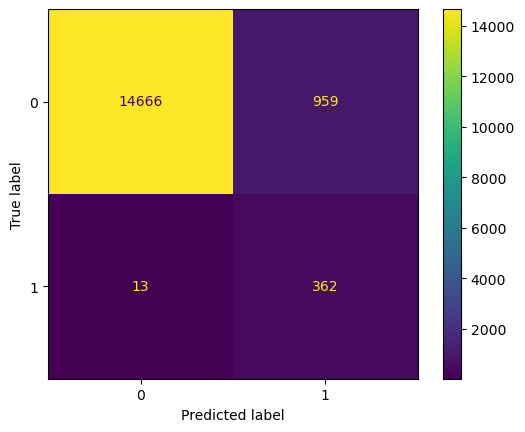

In [104]:
cm_present = confusion_matrix(y_present_trans, y_pres_pred, labels=best_classifier)
disp_present = ConfusionMatrixDisplay(confusion_matrix=cm_present, display_labels=best_classifier)
_ = disp_present.plot()

14666 True negatives, 13 False Negatives, 959 False Positives e 362 True Positives

In [111]:
def calc_total_cost(confusion_matrix):
    return (confusion_matrix[1][0] * 500) + (confusion_matrix[0][1] * 10) + (confusion_matrix[1][1] * 25)

In [112]:
calc_total_cost(cm_present)

25140

Assuming that the company's total expenditure on maintaining truck air systems this year was similar to that of 2020 (without a Machine Learning model), then the company would save approximately a total of 11860 dollars in one year!

### Exporting the best model

In [113]:
joblib.dump(bayes_search, '../aproved_models/model.pk')

['../aproved_models/model.pk']